In [ ]:
 !pip install -U scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


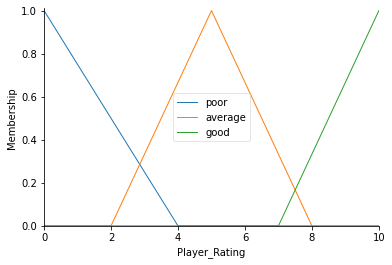

In [ ]:
Player_Rating = ctrl.Antecedent(np.arange(0,11,1),"Player_Rating") 

Player_Rating['poor'] = fuzz.trimf(Player_Rating.universe, [0,0,4])
Player_Rating['average'] = fuzz.trimf(Player_Rating.universe, [2,5,8])
Player_Rating['good'] = fuzz.trimf(Player_Rating.universe, [7,10,10])

Player_Rating.view()

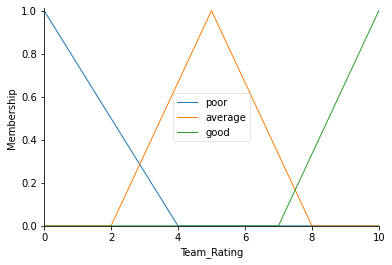

In [ ]:
Team_Rating = ctrl.Antecedent(np.arange(0,11,1),"Team_Rating") 

Team_Rating['poor'] = fuzz.trimf(Team_Rating.universe, [0,0,4])
Team_Rating['average'] = fuzz.trimf(Team_Rating.universe, [2,5,8])
Team_Rating['good'] = fuzz.trimf(Team_Rating.universe, [7,10,10])

Team_Rating.view()

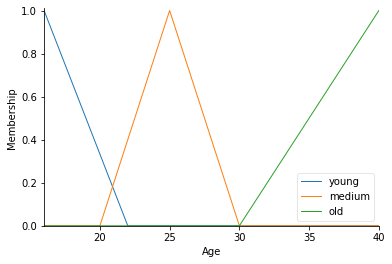

In [ ]:
Age = ctrl.Antecedent(np.arange(16,41,1),"Age") 

Age['young'] = fuzz.trimf(Age.universe, [16,16,22])
Age['medium'] = fuzz.trimf(Age.universe, [20,25,30])
Age['old'] = fuzz.trimf(Age.universe, [30,40,40])

Age.view()

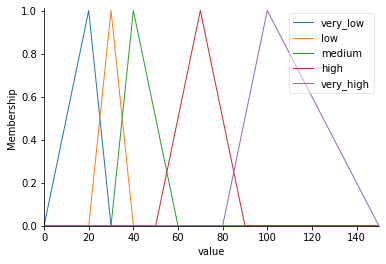

In [ ]:
value = ctrl.Consequent(np.arange(0, 151, 1), 'value') 

value['very_low'] = fuzz.trimf(value.universe, [0,20,30])
value['low'] = fuzz.trimf(value.universe, [20,30,40])
value['medium'] = fuzz.trimf(value.universe, [30,40,60])
value['high'] = fuzz.trimf(value.universe, [50,70,90])
value['very_high'] = fuzz.trimf(value.universe, [80,100,150])


value.view()

In [ ]:

rule1 = ctrl.Rule(Team_Rating['poor'] | Player_Rating['poor'] | Age['old'], value['very_low'])



rule3 = ctrl.Rule(Team_Rating['poor'] | Player_Rating['poor'] | Age['young'], value['low'])

rule6 = ctrl.Rule(Team_Rating['average'] | Player_Rating['average'] | Age['old'], value['low'])


rule10 = ctrl.Rule(Team_Rating['good'] | Player_Rating['good'] | Age['old'], value['medium'])

rule11 = ctrl.Rule(Team_Rating['good'] | Player_Rating['good'] | Age['young'], value['very_high'])

rule13 = ctrl.Rule(Team_Rating['good'] | Player_Rating['good'] | Age['medium'], value['high'])




val_ctrl = ctrl.ControlSystem([rule1,rule3,rule6,rule10,rule11,rule13])



valuing = ctrl.ControlSystemSimulation(val_ctrl)

valuing.input['Player_Rating'] = 7.42
valuing.input['Team_Rating'] = 7.2
valuing.input['Age']=23


valuing.compute()
y= " million"
p=round(valuing.output['value'],2)

print(str(p )+ str(y))




75.08 million


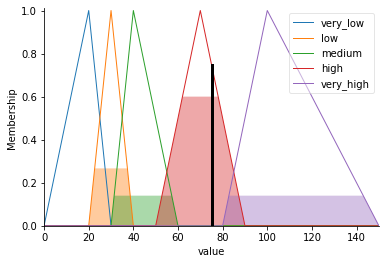

In [ ]:
value.view(sim=valuing)